# Gradient Descent

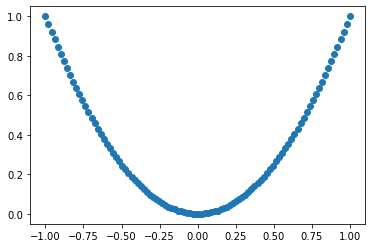

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)
plt.scatter(x,y)




In [2]:
class fit(nn.Module):
    def __init__(self,n_features,n_hidden):
        super(fit,self).__init__()
        #define Layers
        self.network=nn.Sequential(
            nn.Linear(n_features,10),
            nn.ReLU(),
            nn.Linear(n_hidden,1),#output layer
        )
        
    def forward(self,x):
        y=self.network(x)
        return y

In [13]:
model = fit(n_features = 1,n_hidden=10)

optimizer = torch.optim.SGD(model.parameters(),lr=.1)

loss_fn = nn.MSELoss()

loss_list = []
max_iter = 200

for epoch in range(max_iter):
    prediction = model(x)
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss)
    optimizer.zero_grad()
    if epoch%10==0:
        print(f'Epoch: {epoch}, loss = {loss.item():.4f}')

Epoch: 0, loss = 0.3344
Epoch: 10, loss = 0.0747
Epoch: 20, loss = 0.0616
Epoch: 30, loss = 0.0531
Epoch: 40, loss = 0.0453
Epoch: 50, loss = 0.0379
Epoch: 60, loss = 0.0312
Epoch: 70, loss = 0.0254
Epoch: 80, loss = 0.0204
Epoch: 90, loss = 0.0164
Epoch: 100, loss = 0.0132
Epoch: 110, loss = 0.0108
Epoch: 120, loss = 0.0090
Epoch: 130, loss = 0.0076
Epoch: 140, loss = 0.0066
Epoch: 150, loss = 0.0058
Epoch: 160, loss = 0.0053
Epoch: 170, loss = 0.0049
Epoch: 180, loss = 0.0046
Epoch: 190, loss = 0.0043


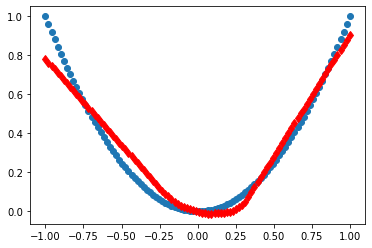

In [14]:
plt.scatter(x,y)
plt.plot(x,prediction.detach(),'rd')

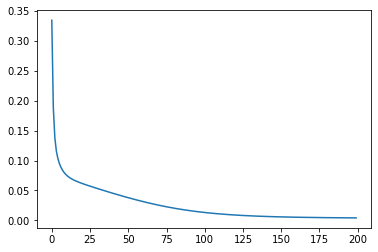

In [17]:
l_stack = torch.stack(loss_list)
plt.plot(l_stack.detach())

# Stochastic Gradient descent

In [61]:
model = fit(n_features = 1,n_hidden=10)

optimizer = torch.optim.SGD(model.parameters(),lr=.1)

loss_fn = nn.MSELoss()

loss_list = []
max_iter = 500

for epoch in range(max_iter):
    for x_i,y_i in zip(x,y):
        prediction = model(x_i)
        loss = loss_fn(prediction, y_i)
        loss.backward()
        optimizer.step()
        loss_list.append(loss)
        optimizer.zero_grad()
    if epoch%20==0:
        print(f'Epoch: {epoch}, loss = {loss.item():.4f}')
prediction = model(x)

Epoch: 0, loss = 0.0006
Epoch: 20, loss = 0.0001
Epoch: 40, loss = 0.0000
Epoch: 60, loss = 0.0000
Epoch: 80, loss = 0.0000
Epoch: 100, loss = 0.0000
Epoch: 120, loss = 0.0000
Epoch: 140, loss = 0.0000
Epoch: 160, loss = 0.0000
Epoch: 180, loss = 0.0000
Epoch: 200, loss = 0.0000
Epoch: 220, loss = 0.0000
Epoch: 240, loss = 0.0000
Epoch: 260, loss = 0.0000
Epoch: 280, loss = 0.0000
Epoch: 300, loss = 0.0000
Epoch: 320, loss = 0.0000
Epoch: 340, loss = 0.0000
Epoch: 360, loss = 0.0000
Epoch: 380, loss = 0.0000
Epoch: 400, loss = 0.0000
Epoch: 420, loss = 0.0000
Epoch: 440, loss = 0.0000
Epoch: 460, loss = 0.0000
Epoch: 480, loss = 0.0000


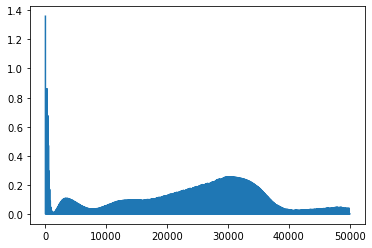

In [62]:
l_stack = torch.stack(loss_list)
plt.plot(l_stack.detach())

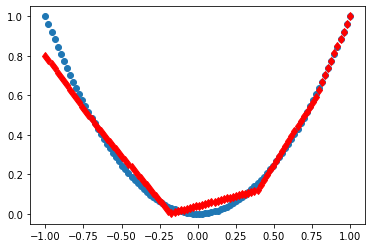

In [64]:
plt.scatter(x,y)
plt.plot(x,prediction.detach(),'rd')

# Mini-Batch Gradient Descent

In [66]:
model = fit(n_features = 1,n_hidden=10)

optimizer = torch.optim.SGD(model.parameters(),lr=.1)

loss_fn = nn.MSELoss()

batch_size = 10
n_batch = int(len(x)/batch_size)

loss_list = []
max_iter = 500

for epoch in range(max_iter):
    for batch in range(n_batch):
        x_batch = x[batch*batch_size:(batch+1)*batch_size]
        y_batch = y[batch*batch_size:(batch+1)*batch_size]
        prediction = model(x_batch)
        loss = loss_fn(prediction, y_batch)
        loss.backward()
        optimizer.step()
        loss_list.append(loss)
        optimizer.zero_grad()
    if epoch%20==0:
        print(f'Epoch: {epoch}, loss = {loss.item():.4f}')
prediction = model(x)

Epoch: 0, loss = 0.4365
Epoch: 20, loss = 0.0151
Epoch: 40, loss = 0.0051
Epoch: 60, loss = 0.0028
Epoch: 80, loss = 0.0019
Epoch: 100, loss = 0.0016
Epoch: 120, loss = 0.0015
Epoch: 140, loss = 0.0015
Epoch: 160, loss = 0.0014
Epoch: 180, loss = 0.0013
Epoch: 200, loss = 0.0013
Epoch: 220, loss = 0.0012
Epoch: 240, loss = 0.0012
Epoch: 260, loss = 0.0011
Epoch: 280, loss = 0.0011
Epoch: 300, loss = 0.0011
Epoch: 320, loss = 0.0010
Epoch: 340, loss = 0.0010
Epoch: 360, loss = 0.0009
Epoch: 380, loss = 0.0009
Epoch: 400, loss = 0.0009
Epoch: 420, loss = 0.0009
Epoch: 440, loss = 0.0008
Epoch: 460, loss = 0.0008
Epoch: 480, loss = 0.0008


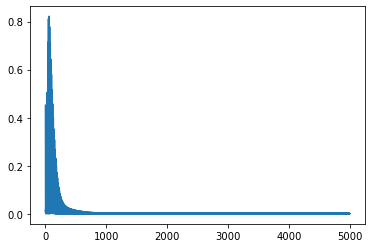

In [67]:
l_stack = torch.stack(loss_list)
plt.plot(l_stack.detach()[:])

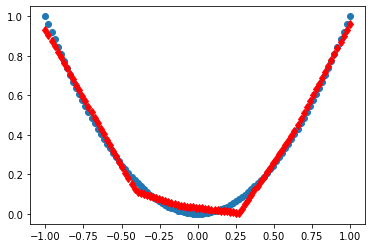

In [68]:
plt.scatter(x,y)
plt.plot(x,prediction.detach(),'rd')

In [155]:
def ArrayChallenge(arr):
    import numpy as np
    arr=np.array(arr)
    answer = []
    for i in range(len(arr)):
        m = np.where(np.array(arr[:i]<=arr[i])==True)
        if len(m[0])==0:
            answer.append(-1)
        else:
            j = np.max(m)
            answer.append(arr[j])
    return answer

In [158]:
arr = np.array([8,7,6,5,4,3,2,1])
a=ArrayChallenge(arr)
a=[str(i) for i in a]
' '.join(a)

'-1 -1 -1 -1 -1 -1 -1 -1'

In [124]:
i=0
m = arr[:i]<arr[i]
print(np.max(np.where(m==True)))

ValueError: zero-size array to reduction operation maximum which has no identity

In [143]:
i=0
len(np.where(np.array(arr[:i]<arr[i])==True)[0])

0